In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial import distance
plt.rcParams['figure.dpi'] = 200

In [2]:
# find current working directoy
cwd_path = Path().absolute()
data_root = cwd_path.parent.parent / "data"
experiment = "cerebellum"
chrom_list = [f"chr{x}" for x in range(1, 20)]
chrom_list.append("chrX")

# Specify the cells and markers you want to check

In [3]:
cell_types = ["Granule", "Purkinje", "MLI1",  "MLI2+PLI", "Bergmann"]
markers = ["RNAPIISer5-P", "LaminB1", "n_rad_score", "n_per_dist(um)"]
col_dict = {}
for m in markers:
    col_dict[m] = [f"{m}_{ct}" for ct in cell_types]

# Read the scRNA expression and celltype specific PolII expression profile (Already exclude chrX)

In [4]:
IF_sc_df = pd.read_csv( str(data_root /  experiment / "Fig3" / "long_gene_polII_scRNAcounts.csv"))
# take a look 
IF_sc_df

# get the matrix dict
mtx_dict = {m : IF_sc_df[col_dict[m]].values for m in markers }

# Compute correlation of gene expression and polII level

In [5]:
sc_mtx = IF_sc_df[cell_types].values

# set the matrix standard to compare to
mtx = mtx_dict["RNAPIISer5-P"]
corr = []
for i in range(mtx.shape[0]):
    x = mtx[i]
    y = sc_mtx[i]
    corr.append(np.corrcoef(x, y)[0, 1])
corr = np.array(corr)

In [6]:
sc_mtx = IF_sc_df[cell_types].values

# set the matrix standard to compare to
mtx = mtx_dict["RNAPIISer5-P"]
corr = []
for i in range(mtx.shape[0]):
    x = mtx[i]
    y = sc_mtx[i]
    corr.append(np.corrcoef(x, y)[0, 1])
corr = np.array(corr)

In [7]:
# choose genes have higher then 0.8 correlation
c_idx = corr > 0.8

# subsample only high correlated genes
plot_df = IF_sc_df.iloc[c_idx, :]
# extract matrix information again from selected genes
sc_mtx = plot_df[cell_types].values
mtx = plot_df[col_dict["RNAPIISer5-P"]].values

print(f"Extracted {len(mtx)} long genes")

Extracted 132 long genes


In [8]:
# Here we extracted the highly correlated 132 genes

In [9]:
plot_df

,gene,avrg_gene_density,Xist_RNA_Granule,ITS1_RNA_Granule,Rnu2_RNA_Granule,polyA_RNA_Granule,Malat1_RNA_Granule,CPSF6_Granule,ATRX_Granule,H4K8ac_Granule,...,Granule,Macrophage,Microglia,MLI1,MLI2,ODC,OPC,Purkinje,UBC,MLI2+PLI
13,A330093E20Rik,1.500000,-0.152965,-0.175095,-0.334485,-0.102360,-0.361240,-0.157510,0.028211,-0.092886,...,-0.313248,-0.397705,-0.392084,-0.281604,-0.312182,-0.365691,-0.307693,-0.271697,-0.234265,-0.241673
22,Adam12,1.666667,-0.157480,-0.154810,0.718790,0.432350,0.610370,0.811440,0.615860,0.895100,...,-0.338617,-0.343560,-0.338997,-0.009698,-0.233916,-0.289489,0.676845,-0.162850,-0.337803,-0.248896
27,Adamts2,5.500000,-0.155190,-0.143510,0.868410,0.590820,0.670370,0.877460,0.648750,0.811840,...,-0.595704,-0.667493,-0.644356,2.572569,1.830387,0.333329,-0.406094,-0.642511,-0.336804,1.604993
32,Adarb2,1.000000,-0.155010,-0.195800,-0.389620,-0.252450,-0.397800,-0.440490,-0.079443,-0.346720,...,-0.475984,-0.488636,-0.487501,3.247507,-0.212896,-0.437173,1.478237,-0.485312,-0.483183,0.305803
36,Adgrl3,1.000000,-0.131270,-0.187720,-0.457280,-0.200610,-0.489230,-0.409570,-0.103750,-0.346920,...,-0.449228,-0.749040,-0.741863,2.513919,-0.644736,-0.555758,0.396271,-0.721562,0.169152,-0.452692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,Vwa8,2.666667,-0.127770,-0.170200,-0.214780,0.001467,-0.262590,0.023957,0.118835,0.065525,...,-0.467227,-1.091369,-1.231209,1.528700,0.936417,-0.936871,-1.012110,1.744045,-0.014772,0.745190
848,Xkr4,1.000000,-0.183390,-0.192290,-0.402690,-0.305870,-0.404650,-0.443300,-0.023279,-0.358320,...,0.053302,-0.748526,-0.698239,2.445853,1.742018,-0.053885,0.319863,-0.222647,0.042138,1.176399
851,Xylt1,1.000000,-0.180130,-0.174245,0.314250,0.064290,0.226100,0.067361,0.251440,0.225640,...,-0.441239,-0.437951,-0.324442,-0.433530,-0.443936,-0.398964,3.703929,-0.309635,-0.444378,-0.414974
859,Zfp423,1.500000,-0.145725,-0.159660,0.615650,0.446760,0.381670,0.873540,0.601680,0.974540,...,-0.447686,-1.024287,-1.039650,2.198975,1.830763,-1.010844,-0.601477,-0.512862,-0.499089,1.450461


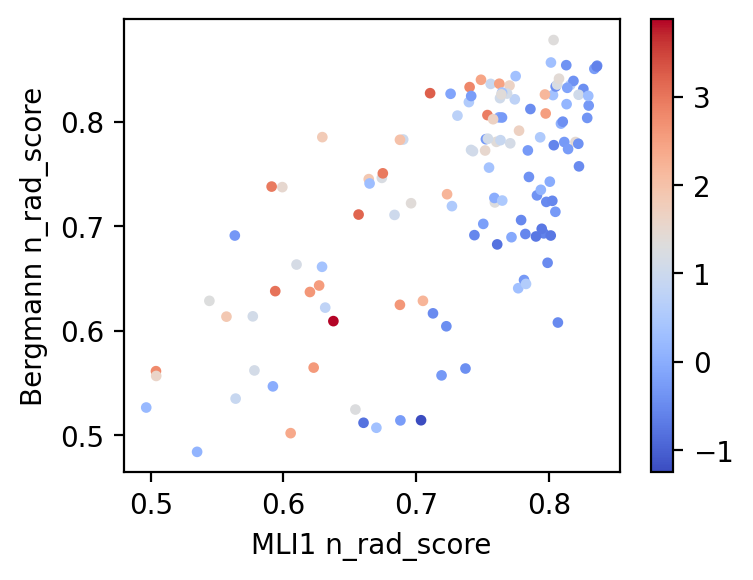

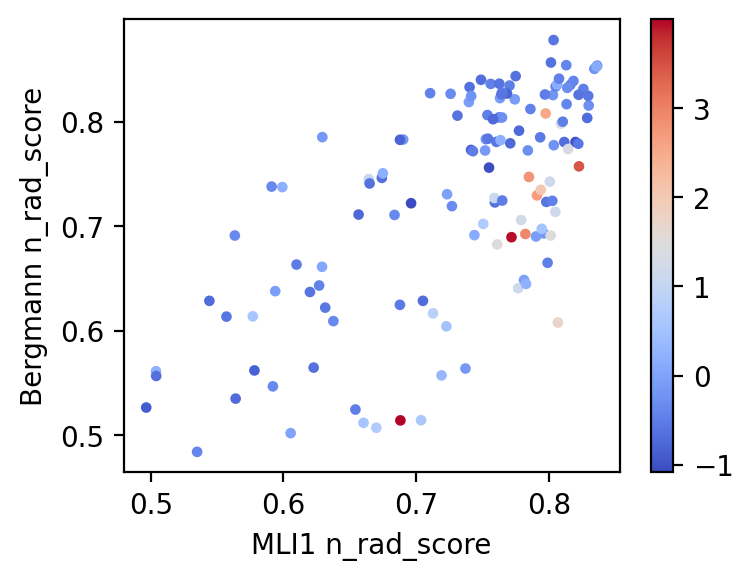

In [10]:
# plt.scatter(plot_df["n_rad_score_MLI1"], plot_df["n_rad_score_Bergmann"], c = "grey", s = 5, alpha = 0.5)
plt.figure(figsize = (4, 3))
a = plt.scatter(plot_df["n_rad_score_MLI1"], plot_df["n_rad_score_Bergmann"], c = plot_df["MLI1"], s = 8, alpha = 1, cmap = "coolwarm")
plt.colorbar(a)
plt.xlabel("MLI1 n_rad_score")
plt.ylabel("Bergmann n_rad_score")
plt.show()
plt.figure(figsize = (4, 3))
b = plt.scatter(plot_df["n_rad_score_MLI1"], plot_df["n_rad_score_Bergmann"], c = plot_df["Bergmann"], s = 8, alpha = 1, cmap = "coolwarm")
plt.colorbar(b)
plt.xlabel("MLI1 n_rad_score")
plt.ylabel("Bergmann n_rad_score")
plt.show()